In [1]:
###capstone GAMING

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
import dill

In [3]:

with open('df_game_removed.pkd', 'rb') as f:
    df_game = dill.load(f)

In [4]:
df_game.describe()

,Price
count,2.152980e+05
mean,1.488457e+03
std,3.665669e+03
min,4.000000e+00
25%,9.880000e+02
50%,1.299910e+03
75%,1.784428e+03
max,1.669366e+06


In [5]:
df_game.head()

,ASIN,Date,Price
0,B00ETM09LK,2015/06/25,999.99
1,B00ETM09LK,2015/06/26,999.00
2,B00ETM09LK,2015/07/15,998.99
3,B00ETM09LK,2015/08/16,998.49
4,B00ETM09LK,2015/08/17,998.19


In [6]:
df_game.tail()

,ASIN,Date,Price
225354,B09YMTWVKX,2022/09/28,2139.0
225355,B09YMTWVKX,2022/10/07,2169.0
225356,B09YMTWVKX,2022/10/10,2159.0
225357,B09YMTWVKX,2022/10/14,2149.0
225358,B09YMTWVKX,2022/11/03,2129.0


In [7]:
df_game.shape

(225359, 3)

In [8]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225359 entries, 0 to 225358
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ASIN    225359 non-null  object 
 1   Date    225359 non-null  object 
 2   Price   215298 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


In [9]:
df_game.isnull().sum()

ASIN         0
Date         0
Price    10061
dtype: int64

In [10]:
df_game.dropna(inplace=True)

In [11]:
df_game

,ASIN,Date,Price
0,B00ETM09LK,2015/06/25,999.99
1,B00ETM09LK,2015/06/26,999.00
2,B00ETM09LK,2015/07/15,998.99
3,B00ETM09LK,2015/08/16,998.49
4,B00ETM09LK,2015/08/17,998.19
...,...,...,...
225354,B09YMTWVKX,2022/09/28,2139.00
225355,B09YMTWVKX,2022/10/07,2169.00
225356,B09YMTWVKX,2022/10/10,2159.00
225357,B09YMTWVKX,2022/10/14,2149.00


In [12]:
df_game.reset_index(inplace=True)

In [13]:
df_game

,index,ASIN,Date,Price
0,0,B00ETM09LK,2015/06/25,999.99
1,1,B00ETM09LK,2015/06/26,999.00
2,2,B00ETM09LK,2015/07/15,998.99
3,3,B00ETM09LK,2015/08/16,998.49
4,4,B00ETM09LK,2015/08/17,998.19
...,...,...,...,...
215293,225354,B09YMTWVKX,2022/09/28,2139.00
215294,225355,B09YMTWVKX,2022/10/07,2169.00
215295,225356,B09YMTWVKX,2022/10/10,2159.00
215296,225357,B09YMTWVKX,2022/10/14,2149.00


In [14]:
len(pd.unique(df_game['ASIN']))

2416

In [15]:
ASIN = df_game['ASIN'].unique()

In [16]:
ASIN

array(['B00ETM09LK', 'B00S9SHV3O', 'B00VBOCI9K', ..., 'B09YMTL7PJ',
       'B09YMTLMYP', 'B09YMTWVKX'], dtype=object)

In [17]:
df_game.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

Price                                                     
           count         mean    median         std      min      max
ASIN                                                                 
B00ETM09LK   325   863.428892   839.700  123.257549   759.00  1869.28
B00S9SHV3O    50  1198.702600  1274.555  222.268531   659.00  1399.99
B00VBOCI9K    91  1357.558571  1280.010  291.925772   937.05  2143.50
B00VBOCIE0   147  1367.977959  1220.000  336.242761   999.00  2244.87
B00WM4QSVM    14   856.496429   849.000   50.839378   799.00   929.00
...          ...          ...       ...         ...      ...      ...
B09YKTYG87    24  2164.980833  2189.000  293.418123  1850.00  2625.00
B09YMSXKN8    13  3181.307692  3149.000   88.896367  3059.00  3299.00
B09YMTL7PJ    10  1912.000000  1914.000   64.126611  1829.00  1999.00
B09YMTLMYP    13  2229.769231  2199.000   80.359768  2129.00  2349.00
B09YMTWVKX    12  2187.333333  2169.000   52.019810  2129.00  2299.00

[2416 rows x 6 columns]

In [18]:
df_abstract = df_game.groupby(['ASIN']).agg({'Price': ['count', 'mean', 'median', 'std', 'min', 'max'] })

In [19]:
df_game['Date'] = pd.to_datetime(df_game['Date'])

In [20]:
df_game.drop('index', axis=1, inplace=True)

In [21]:
df_game

,ASIN,Date,Price
0,B00ETM09LK,2015-06-25,999.99
1,B00ETM09LK,2015-06-26,999.00
2,B00ETM09LK,2015-07-15,998.99
3,B00ETM09LK,2015-08-16,998.49
4,B00ETM09LK,2015-08-17,998.19
...,...,...,...
215293,B09YMTWVKX,2022-09-28,2139.00
215294,B09YMTWVKX,2022-10-07,2169.00
215295,B09YMTWVKX,2022-10-10,2159.00
215296,B09YMTWVKX,2022-10-14,2149.00


In [22]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215298 entries, 0 to 215297
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ASIN    215298 non-null  object        
 1   Date    215298 non-null  datetime64[ns]
 2   Price   215298 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.9+ MB


In [23]:
df_game.groupby(['ASIN']).agg({'Date': ['count',  'min', 'max'] })

Date                      
           count        min        max
ASIN                                  
B00ETM09LK   325 2015-06-25 2022-07-12
B00S9SHV3O    50 2015-02-08 2022-07-18
B00VBOCI9K    91 2015-05-02 2022-08-24
B00VBOCIE0   147 2015-06-27 2020-09-03
B00WM4QSVM    14 2020-09-07 2022-11-11
...          ...        ...        ...
B09YKTYG87    24 2022-04-25 2022-11-17
B09YMSXKN8    13 2022-04-28 2022-10-14
B09YMTL7PJ    10 2022-05-09 2022-11-04
B09YMTLMYP    13 2022-05-06 2022-10-14
B09YMTWVKX    12 2022-05-03 2022-11-03

[2416 rows x 3 columns]

In [24]:
def date_time_features(df):
    """
    time series features based on time series index.
    """
    df = df.copy()
    #df['hour'] = df.index.hour
    df['dayofweek'] = df.Date.dt.dayofweek
    df['quarter'] = df.Date.dt.quarter
    df['month'] = df.Date.dt.month
    df['year'] = df.Date.dt.year
    df['dayofyear'] = df.Date.dt.dayofyear
    df['dayofmonth'] = df.Date.dt.day
    df['weekofyear'] = df.Date.dt.isocalendar().week.astype("int64")
    # 0: Winter - 1: Spring - 2: Summer - 3: Fall
    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])
    return df

In [25]:
df1= date_time_features(df_game)
df1

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,season
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,2
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,2
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,2
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,2
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,2
...,...,...,...,...,...,...,...,...,...,...,...
215293,B09YMTWVKX,2022-09-28,2139.00,2,3,9,2022,271,28,39,3
215294,B09YMTWVKX,2022-10-07,2169.00,4,4,10,2022,280,7,40,3
215295,B09YMTWVKX,2022-10-10,2159.00,0,4,10,2022,283,10,41,3
215296,B09YMTWVKX,2022-10-14,2149.00,4,4,10,2022,287,14,41,3


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215298 entries, 0 to 215297
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ASIN        215298 non-null  object        
 1   Date        215298 non-null  datetime64[ns]
 2   Price       215298 non-null  float64       
 3   dayofweek   215298 non-null  int64         
 4   quarter     215298 non-null  int64         
 5   month       215298 non-null  int64         
 6   year        215298 non-null  int64         
 7   dayofyear   215298 non-null  int64         
 8   dayofmonth  215298 non-null  int64         
 9   weekofyear  215298 non-null  int64         
 10  season      215298 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 17.2+ MB


In [27]:
## Lag features and window features

In [28]:
# ### Because they are based on the idea that the past might impact the present or even hold some sort of inherent knowledge 
# about the future, lag features are values at earlier timesteps that are deemed valuable. 
# For instance, if you want to forecast comparable price the next week, it can be helpful to generate characteristics 
# for price that occurred the prior week 

In [29]:
def lag_features(df, lags):
    for lag in lags:
        df['price_lag_' + str(lag)] = df.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag))
    return df

In [30]:
# Our main goal is to identify the trend, seasonality, and level. 
# This time period has been added in increments of three months, such as three months + one week, three months plus two weeks, 
# six months, etc., because it is three months long.

In [31]:
df1= lag_features(df1, [91, 98, 105, 112, 119, 126, 182, 364, 546, 728])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728
215293,B09YMTWVKX,2022-09-28,2139.0,2,3,9,2022,271,28,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215294,B09YMTWVKX,2022-10-07,2169.0,4,4,10,2022,280,7,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215295,B09YMTWVKX,2022-10-10,2159.0,0,4,10,2022,283,10,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215296,B09YMTWVKX,2022-10-14,2149.0,4,4,10,2022,287,14,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215297,B09YMTWVKX,2022-11-03,2129.0,3,4,11,2022,307,3,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Rolling Mean Features
# The moving average feature is derived using the rolling approach. 
# The window argument also conveys the number of steps remaining. Past 2-3-5 numbers, on average, etc.

# When employing the rolling approach, it takes into account all past averages, 
# including itself. This is a problem. Therefore, after receiving a delay, we must produce the moving average feature.

In [34]:
def roll_mean_features(df, windows):
    for window in windows:
        df['price_roll_mean_' + str(window)] = df.groupby(["ASIN"])['Price']. \
                                             transform(lambda x: x.shift(1).rolling(window=window, min_periods=10, win_type="triang").mean())
    return df

In [35]:
# to reflect information about 1 and 1.5 years ago in the data:

In [36]:
df1= roll_mean_features(df1, [365, 546])

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,price_lag_364,price_lag_546,price_lag_728,price_roll_mean_365,price_roll_mean_546
215293,B09YMTWVKX,2022-09-28,2139.0,2,3,9,2022,271,28,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215294,B09YMTWVKX,2022-10-07,2169.0,4,4,10,2022,280,7,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215295,B09YMTWVKX,2022-10-10,2159.0,0,4,10,2022,283,10,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215296,B09YMTWVKX,2022-10-14,2149.0,4,4,10,2022,287,14,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2218.818182,2221.000000
215297,B09YMTWVKX,2022-11-03,2129.0,3,4,11,2022,307,3,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2214.454545,2216.438017


In [38]:
# Exponentially Weighted Mean Features
# design features whose values of exponential moving average match to various alpha values.

In [39]:
def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['price_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["ASIN"])['Price'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [40]:
alphas = [0.95, 0.9, 0.8, 0.7, 0.5]
lags   = [91, 98, 105, 112, 180, 270, 365, 546, 728]


df1= ewm_features(df1, alphas, lags)

df1.head()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
0,B00ETM09LK,2015-06-25,999.99,3,2,6,2015,176,25,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00ETM09LK,2015-06-26,999.00,4,2,6,2015,177,26,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00ETM09LK,2015-07-15,998.99,2,3,7,2015,196,15,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00ETM09LK,2015-08-16,998.49,6,3,8,2015,228,16,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00ETM09LK,2015-08-17,998.19,0,3,8,2015,229,17,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df1.tail()

,ASIN,Date,Price,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,...,price_ewm_alpha_07_lag_728,price_ewm_alpha_05_lag_91,price_ewm_alpha_05_lag_98,price_ewm_alpha_05_lag_105,price_ewm_alpha_05_lag_112,price_ewm_alpha_05_lag_180,price_ewm_alpha_05_lag_270,price_ewm_alpha_05_lag_365,price_ewm_alpha_05_lag_546,price_ewm_alpha_05_lag_728
215293,B09YMTWVKX,2022-09-28,2139.0,2,3,9,2022,271,28,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215294,B09YMTWVKX,2022-10-07,2169.0,4,4,10,2022,280,7,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215295,B09YMTWVKX,2022-10-10,2159.0,0,4,10,2022,283,10,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215296,B09YMTWVKX,2022-10-14,2149.0,4,4,10,2022,287,14,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215297,B09YMTWVKX,2022-11-03,2129.0,3,4,11,2022,307,3,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df1.shape

(215298, 68)

In [43]:
# One-Hot-Encoding

In [44]:
df2 = pd.get_dummies(df1, columns=[ 'dayofweek', "quarter", 'month', "year", "season"])
df2.shape

(215298, 98)

In [45]:
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00ETM09LK,2015-06-25,999.99,176,25,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00ETM09LK,2015-06-26,999.00,177,26,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00ETM09LK,2015-07-15,998.99,196,15,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00ETM09LK,2015-08-16,998.49,228,16,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00ETM09LK,2015-08-17,998.19,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [46]:
###Logarithmic Transformation for Sales data

In [47]:
df2['Price']= np.log1p(df2["Price"].values)
df2.head()

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
0,B00ETM09LK,2015-06-25,6.908745,176,25,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,B00ETM09LK,2015-06-26,6.907755,177,26,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
2,B00ETM09LK,2015-07-15,6.907745,196,15,29,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
3,B00ETM09LK,2015-08-16,6.907245,228,16,33,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
4,B00ETM09LK,2015-08-17,6.906945,229,17,34,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [48]:
# Splitting Train and Test

In [49]:
df_model= df2.copy()

In [50]:
# from sklearn.model_selection import train_test_split

In [51]:
# train, val = train_test_split(df_model, test_size=0.2, random_state=None, shuffle=False)

In [52]:
from sklearn.model_selection import TimeSeriesSplit

In [53]:
tscv = TimeSeriesSplit(gap=5, max_train_size=150000, n_splits = 3)

In [54]:
print(tscv)

TimeSeriesSplit(gap=5, max_train_size=150000, n_splits=3, test_size=None)


In [55]:
tscv.split(df_model)

<generator object TimeSeriesSplit.split at 0x0000024380F24C10>

In [56]:
for i, (train_index, test_index) in enumerate(tscv.split(df_model)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[    0     1     2 ... 53818 53819 53820]
  Test:  index=[ 53826  53827  53828 ... 107647 107648 107649]
Fold 1:
  Train: index=[     0      1      2 ... 107642 107643 107644]
  Test:  index=[107650 107651 107652 ... 161471 161472 161473]
Fold 2:
  Train: index=[ 11469  11470  11471 ... 161466 161467 161468]
  Test:  index=[161474 161475 161476 ... 215295 215296 215297]


In [57]:
train_index

array([ 11469,  11470,  11471, ..., 161466, 161467, 161468])

In [58]:
test_index

array([161474, 161475, 161476, ..., 215295, 215296, 215297])

In [59]:
testo = df_model.iloc[test_index]

In [60]:
testo

,ASIN,Date,Price,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
161474,B098K1PXDX,2021-11-10,8.594154,314,10,45,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,1
161475,B098K1PXDX,2022-01-19,8.546752,19,19,3,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,1,0,0,0
161476,B098K1PXDX,2022-07-01,8.546752,182,1,26,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,1,0
161477,B098K1PXDX,2022-09-30,8.546752,273,30,39,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
161478,B098K1Q1BR,2021-08-12,8.540910,224,12,32,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215293,B09YMTWVKX,2022-09-28,7.668561,271,28,39,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
215294,B09YMTWVKX,2022-10-07,7.682482,280,7,40,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
215295,B09YMTWVKX,2022-10-10,7.677864,283,10,41,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
215296,B09YMTWVKX,2022-10-14,7.673223,287,14,41,NaN,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


In [61]:
traino = df_model.iloc[train_index]

In [62]:
cols = [col for col in traino.columns if col not in ['Date', 'ASIN', "Price", "year"]]

In [63]:
X_train = traino[cols]
Y_train = traino['Price']

X_val = testo[cols]
Y_val = testo['Price']

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((150000, 95), (150000,), (53824, 95), (53824,))

In [61]:
# train

In [62]:
# val

In [63]:
# cols = [col for col in train_index.columns if col not in ['Date', 'ASIN', "Price", "year"]]

In [64]:
# X_train = train_index[cols]
# Y_train = train_index['Price']

# X_val = test_index[cols]
# Y_val = test_index['Price']

# X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

In [136]:
###Building and Running XGB Regressor

In [64]:
# SMAPE: Symmetric mean absolute percentage error (adjusted MAPE)
def smape(preds, target):
    n = len(preds)
    masked_arr = ~((preds == 0) & (target == 0))
    preds, target = preds[masked_arr], target[masked_arr]
    num = np.abs(preds-target)
    denom = np.abs(preds)+np.abs(target)
    smape_val = (200*np.sum(num/denom))/n
    return smape_val

def xgb_smape(y_pred, y_true):
    smape_val = smape(np.expm1(preds), np.expm1(y_true))
    return 'SMAPE', smape_val, False

In [61]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import xgboost as xgb

In [93]:
model= xgb.XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [86]:
from sklearn.metrics import explained_variance_score,mean_absolute_error, mean_squared_error, r2_score

In [87]:
# To assess the variation between predictions and actual data, 
# the SMAPE (Symmetric mean absolute percentage error (adjusted MAPE)) metric.

In [94]:
%%time
first_model= model.fit(X_train, Y_train,
                       eval_metric= lambda y_pred, y_true: [xgb_smape(y_pred, y_true)])


print("VALID SMAPE:", smape(np.expm1(first_model.predict(X_val)), np.expm1(Y_val)))

print("\tExplained variance:", explained_variance_score(Y_val, first_model.predict(X_val)))
print("\tMean absolute error (MAE):", mean_absolute_error(Y_val, first_model.predict(X_val)))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(Y_val, first_model.predict(X_val))))
print("\tR2 score:", r2_score(Y_val, first_model.predict(X_val)))

C:\Users\EVA\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


VALID SMAPE: 13.774327245740608
	Explained variance: 0.6373277567298206
	Mean absolute error (MAE): 0.1417890699977855
	Root Mean squared error (RMSE): 0.2560184501807132
	R2 score: 0.6344652914864393
Wall time: 45.2 s


In [66]:
# Feature importances

# Which features are the most important in the regression calculation?

In [70]:
feature_importance= pd.DataFrame(data   = first_model.feature_importances_,
                 index  = first_model.feature_names_in_,
                 columns= ['importance'])
feature_importance.sort_values('importance', ascending=False).head(25)

,importance
price_roll_mean_365,0.440286
price_roll_mean_546,0.194823
year_2021,0.026959
year_2019,0.018262
price_ewm_alpha_05_lag_728,0.016894
month_2,0.009034
price_ewm_alpha_05_lag_270,0.008952
quarter_2,0.008644
season_2,0.007139
price_ewm_alpha_07_lag_91,0.006573


In [ ]:
# Test Data Predictions

In [126]:
# from sklearn.model_selection import train_test_split

In [127]:
# df_final_model= df2.copy()

In [154]:
# train, test = train_test_split(df_final_model, test_size=0.2, random_state=None, shuffle=False)

In [71]:
# train.head()

In [156]:
# Y_train = train['Price']

In [61]:
Y_train

0         6.908745
1         6.907755
2         6.907745
3         6.907245
4         6.906945
            ...   
179410    7.437495
179411    7.447745
179412    7.447163
179413    7.447745
179414    7.442633
Name: Price, Length: 179415, dtype: float64

In [62]:
# X_train = train[cols]

In [98]:
X_train.head()

,dayofyear,dayofmonth,weekofyear,price_lag_91,price_lag_98,price_lag_105,price_lag_112,price_lag_119,price_lag_126,price_lag_182,...,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,season_0,season_1,season_2,season_3
11469,199,18,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
11470,199,18,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
11471,199,18,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
11472,200,19,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0
11473,200,19,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,1,0


In [74]:
# test

In [161]:
# X_test = test[cols]

In [99]:
X_test = X_val

In [95]:
test_model= xgb.XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.1, max_depth= 3, n_estimators= 1000)

In [100]:
start = time()
xgb_params= {"colsample_bytree": 0.5, 
             "learning_rate": 0.1, 
             "max_depth": 3,
             "n_estimators": 1000,
             "verbose": 100,
             "num_boost_round": model.best_iteration}

xgbtrain_all= xgb.DMatrix(data=X_train, label=Y_train)

test_model= xgb.train(xgb_params, xgbtrain_all,                      
                      num_boost_round=model.best_iteration)

train_time = time() - start
start = time()
test_preds = test_model.predict(xgb.DMatrix(X_test))
predict_time = time()-start

[10:21:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators", "num_boost_round", "verbose" } are not used.



In [101]:
test_preds

array([7.4239345, 7.2820797, 7.195658 , ..., 7.1792765, 7.6054997,
       7.596054 ], dtype=float32)

In [79]:
# test

In [102]:
submission_df = testo.loc[:, ['ASIN', 'Price', 'Date']]
submission_df['Price'] = np.expm1(test_preds)
submission_df['ASIN'] = submission_df.ASIN
submission_df['Date'] = submission_df.Date
submission_df.head()

,ASIN,Price,Date
161474,B098K1PXDX,1674.613159,2021-11-10
161475,B098K1PXDX,1453.008789,2022-01-19
161476,B098K1PXDX,1332.627808,2022-07-01
161477,B098K1PXDX,1340.452881,2022-09-30
161478,B098K1Q1BR,1695.823730,2021-08-12


In [103]:
submission_df.tail(10)

,ASIN,Price,Date
215288,B09YMTWVKX,1339.111572,2022-05-25
215289,B09YMTWVKX,1365.055542,2022-07-17
215290,B09YMTWVKX,1354.715088,2022-08-10
215291,B09YMTWVKX,1354.715088,2022-08-11
215292,B09YMTWVKX,1346.862793,2022-09-20
215293,B09YMTWVKX,1340.854614,2022-09-28
215294,B09YMTWVKX,1368.040894,2022-10-07
215295,B09YMTWVKX,1310.958618,2022-10-10
215296,B09YMTWVKX,2008.215698,2022-10-14
215297,B09YMTWVKX,1989.326660,2022-11-03


In [104]:
submission_df[submission_df['ASIN'] == 'B09HQNF716'] [['Price', 'Date']]

,Price,Date
179406,1650.272217,2021-12-10
179407,1564.912598,2021-12-27
179408,1475.367432,2022-01-10
179409,1567.492310,2022-01-15
179410,1567.492310,2022-01-15
179411,1528.498291,2022-01-16
179412,1528.498291,2022-01-16
179413,1528.498291,2022-01-16
179414,1379.884155,2022-01-20
179415,1378.989624,2022-01-21


In [105]:
df1[df1['ASIN'] == 'B09HQNF716'] [['Price', 'Date']]

,Price,Date
179406,2010.79,2021-12-10
179407,1799.99,2021-12-27
179408,1763.99,2022-01-10
179409,1745.99,2022-01-15
179410,1697.49,2022-01-15
179411,1714.99,2022-01-16
179412,1713.99,2022-01-16
179413,1714.99,2022-01-16
179414,1706.24,2022-01-20
179415,1732.49,2022-01-21


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215298 entries, 0 to 215297
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   ASIN                         215298 non-null  object        
 1   Date                         215298 non-null  datetime64[ns]
 2   Price                        215298 non-null  float64       
 3   dayofweek                    215298 non-null  int64         
 4   quarter                      215298 non-null  int64         
 5   month                        215298 non-null  int64         
 6   year                         215298 non-null  int64         
 7   dayofyear                    215298 non-null  int64         
 8   dayofmonth                   215298 non-null  int64         
 9   weekofyear                   215298 non-null  int64         
 10  season                       215298 non-null  int32         
 11  price_lag_91              

In [107]:
import pandas as pd

In [86]:
df1['Date'] = pd.to_datetime(df1['Date'])

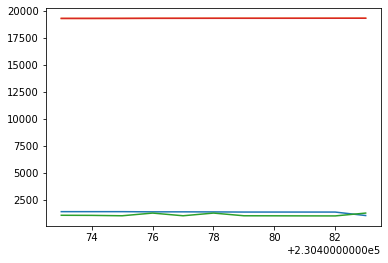

In [99]:
import matplotlib.pyplot as plt

#plot each series
plt.plot(submission_df[submission_df['ASIN'] == 'B0BLH4R831'] [['Price', 'Date']])
plt.plot(df1[df1['ASIN'] == 'B0BLH4R831'] [['Price', 'Date']])


#display plot
plt.show()

In [108]:
predict = pd.DataFrame(submission_df[submission_df['ASIN'] == 'B09HQNF716'] [['Price', 'Date']])

In [109]:
predict

,Price,Date
179406,1650.272217,2021-12-10
179407,1564.912598,2021-12-27
179408,1475.367432,2022-01-10
179409,1567.492310,2022-01-15
179410,1567.492310,2022-01-15
179411,1528.498291,2022-01-16
179412,1528.498291,2022-01-16
179413,1528.498291,2022-01-16
179414,1379.884155,2022-01-20
179415,1378.989624,2022-01-21


In [110]:
predict.index = pd.to_datetime(predict['Date'])

In [111]:
predict

,Price,Date
Date,,
2021-12-10,1650.272217,2021-12-10
2021-12-27,1564.912598,2021-12-27
2022-01-10,1475.367432,2022-01-10
2022-01-15,1567.492310,2022-01-15
2022-01-15,1567.492310,2022-01-15
2022-01-16,1528.498291,2022-01-16
2022-01-16,1528.498291,2022-01-16
2022-01-16,1528.498291,2022-01-16
2022-01-20,1379.884155,2022-01-20


In [112]:
real = df1[df1['ASIN'] == 'B09HQNF716'] [['Price', 'Date']]

In [113]:
real

,Price,Date
179406,2010.79,2021-12-10
179407,1799.99,2021-12-27
179408,1763.99,2022-01-10
179409,1745.99,2022-01-15
179410,1697.49,2022-01-15
179411,1714.99,2022-01-16
179412,1713.99,2022-01-16
179413,1714.99,2022-01-16
179414,1706.24,2022-01-20
179415,1732.49,2022-01-21


In [114]:
real.index = pd.to_datetime(real['Date'])

In [115]:
real

,Price,Date
Date,,
2021-12-10,2010.79,2021-12-10
2021-12-27,1799.99,2021-12-27
2022-01-10,1763.99,2022-01-10
2022-01-15,1745.99,2022-01-15
2022-01-15,1697.49,2022-01-15
2022-01-16,1714.99,2022-01-16
2022-01-16,1713.99,2022-01-16
2022-01-16,1714.99,2022-01-16
2022-01-20,1706.24,2022-01-20


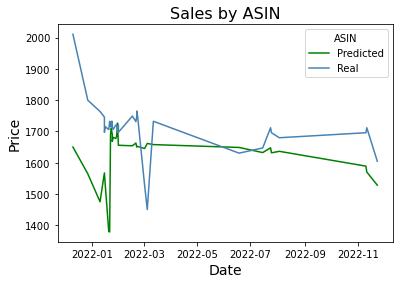

In [116]:
#plot individual lines with custom colors and labels
plt.plot(predict['Price'], label='Predicted', color='green')
plt.plot(real['Price'], label='Real', color='steelblue')


#add legend
plt.legend(title='ASIN')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Sales by ASIN', fontsize=16)

#display plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([<matplotlib.lines.Line2D object at 0x000001ED4F11AA00>,
       <matplotlib.lines.Line2D object at 0x000001ED4F11A100>],
      dtype=object)

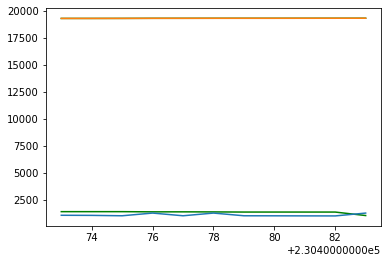

In [100]:
#plot individual lines with custom colors and labels
plt.plot(submission_df[submission_df['ASIN'] == 'B0BLH4R831'] [['Price', 'Date']], label='Predicted', color='green')
plt.plot(plt.plot(df1[df1['ASIN'] == 'B0BLH4R831'] [['Price', 'Date']]), label='Real', color='steelblue')


#add legend
plt.legend(title='ASIN')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Sales by ASIN', fontsize=16)

#display plot
plt.show()

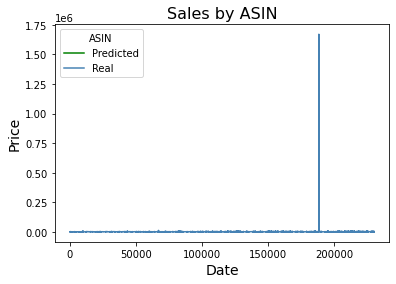

In [108]:
#plot individual lines with custom colors and labels
plt.plot(predict['Price'], label='Predicted', color='green')
plt.plot(df1['Price'], label='Real', color='steelblue')


#add legend
plt.legend(title='ASIN')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.title('Sales by ASIN', fontsize=16)

#display plot
plt.show()

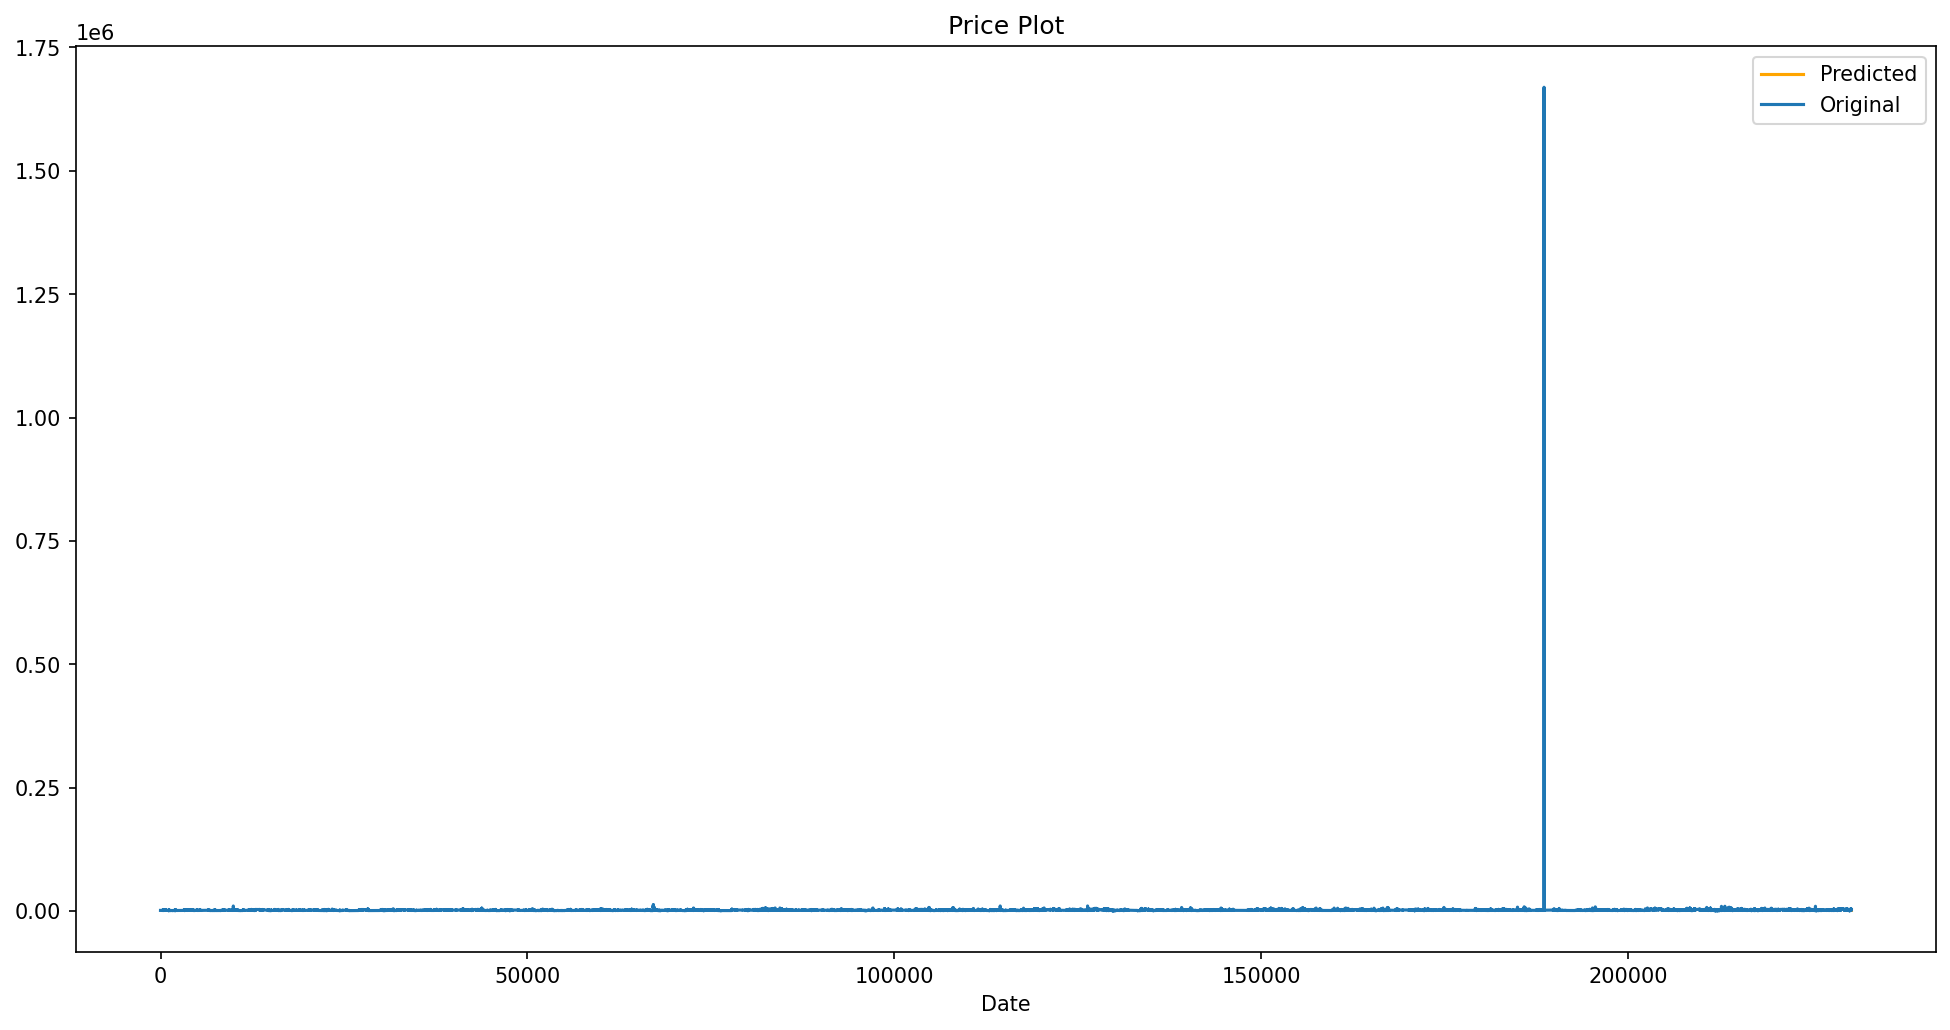

In [107]:

# code
# Visualizing The Open Price of all the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
predict['Price'].plot(label='Predicted', color='orange')
df1['Price'].plot(label='Original')

  
# adding title to the plot
plt.title('Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

In [86]:
df1[df1['ASIN'] == 'B09MFZ4BQG'] [['Price', 'Date']]

,Price,Date
191628,851.39,2021-11-24
191629,851.14,2021-11-25
191630,850.40,2021-11-25
191631,850.35,2021-11-25
191632,850.40,2021-11-26
...,...,...
192154,821.52,2022-11-26
192155,821.48,2022-11-26
192156,821.51,2022-11-27
192157,821.77,2022-11-28
